#  Unificación de puntos por interpolación

In [ ]:
#En este script se busca el maximo de puntos tanto del giroscopio como del acelerometro y se unifican el resto del golpes 
#creando puntos por interpolación hasta llegar a ese numero

In [9]:
import os
import pandas as pd
from scipy import stats
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

In [7]:


# Ruta de la carpeta con los archivos CSV
folder_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\fragmentos_gyr"

# Listar todos los archivos en la carpeta
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Lista para almacenar el número de puntos de cada archivo y sus nombres
point_counts = []
file_point_counts = []

# Leer cada archivo y contar las filas (puntos)
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    point_count = len(df)
    point_counts.append(point_count)
    file_point_counts.append((file, point_count))

# Calcular el máximo, mínimo, la media y la moda
max_points = max(point_counts)
min_points = min(point_counts)
average_points = sum(point_counts) / len(point_counts)
mode_points = stats.mode(point_counts)[0][0]

# Encontrar el archivo con el máximo número de puntos
file_with_max_points = [file for file, count in file_point_counts if count == max_points]

print(f"Número máximo de puntos: {max_points}")
print(f"Número mínimo de puntos: {min_points}")
print(f"Número medio de puntos: {average_points:.2f}")
print(f"Número modal de puntos: {mode_points}")
print(f"Archivo(s) con el máximo número de puntos: {', '.join(file_with_max_points)}")

Número máximo de puntos: 1263
Número mínimo de puntos: 173
Número medio de puntos: 365.61
Número modal de puntos: 325
Archivo(s) con el máximo número de puntos: serve_J6_13.csv


C:\Users\Holacons\AppData\Local\Temp\ipykernel_20828\2895010435.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_points = stats.mode(point_counts)[0][0]


In [6]:


# Ruta de la carpeta con los archivos CSV
folder_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\fragmentos"

# Listar todos los archivos en la carpeta
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Lista para almacenar el número de puntos de cada archivo y sus nombres
point_counts = []
file_point_counts = []

# Leer cada archivo y contar las filas (puntos)
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    point_count = len(df)
    point_counts.append(point_count)
    file_point_counts.append((file, point_count))

# Calcular el máximo, mínimo, la media y la moda
max_points = max(point_counts)
min_points = min(point_counts)
average_points = sum(point_counts) / len(point_counts)
mode_points = stats.mode(point_counts)[0][0]

# Encontrar el archivo con el máximo número de puntos
file_with_max_points = [file for file, count in file_point_counts if count == max_points]

print(f"Número máximo de puntos: {max_points}")
print(f"Número mínimo de puntos: {min_points}")
print(f"Número medio de puntos: {average_points:.2f}")
print(f"Número modal de puntos: {mode_points}")
print(f"Archivo(s) con el máximo número de puntos: {', '.join(file_with_max_points)}")


Número máximo de puntos: 632
Número mínimo de puntos: 87
Número medio de puntos: 183.31
Número modal de puntos: 163
Archivo(s) con el máximo número de puntos: serve_J6_13.csv


C:\Users\Holacons\AppData\Local\Temp\ipykernel_20828\3115187400.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_points = stats.mode(point_counts)[0][0]


Interpolación completada. Archivo guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\fragmentos\archivo_interpolado.csv


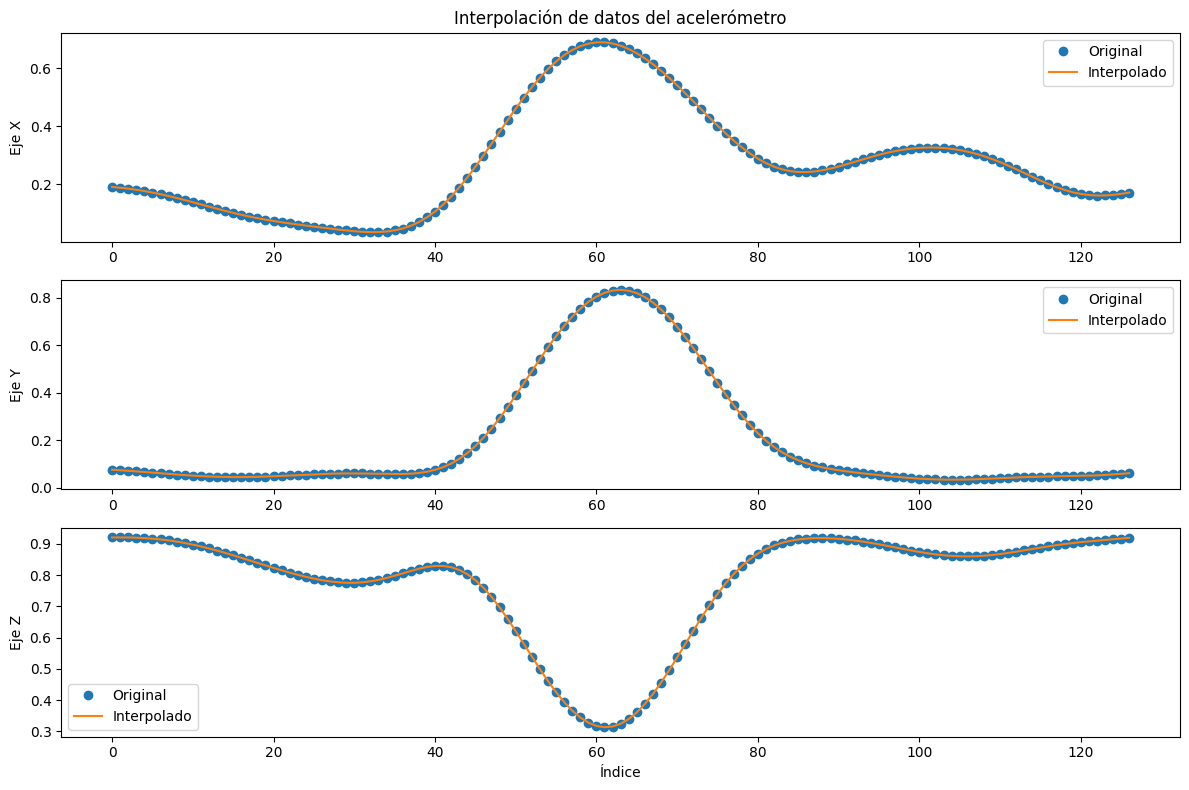

In [8]:

# Ruta del archivo CSV
file_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\fragmentos\derecha_J2_1.csv"

# Leer el archivo CSV
df = pd.read_csv(file_path)

# Seleccionar las columnas de los ejes x, y, z
x = df['ACC_X'].values
y = df['ACC_Y'].values
z = df['ACC_Z'].values

# Número de puntos originales y deseados
original_points = len(x)
desired_points = 1263

# Crear el nuevo array de índices para los puntos interpolados
new_indices = np.linspace(0, original_points - 1, desired_points)

# Crear una función de interpolación para cada eje
interp_x = interpolate.interp1d(np.arange(original_points), x, kind='linear')
interp_y = interpolate.interp1d(np.arange(original_points), y, kind='linear')
interp_z = interpolate.interp1d(np.arange(original_points), z, kind='linear')

# Generar los nuevos puntos interpolados
new_x = interp_x(new_indices)
new_y = interp_y(new_indices)
new_z = interp_z(new_indices)

# Crear un nuevo DataFrame con los puntos interpolados
new_df = pd.DataFrame({'x': new_x, 'y': new_y, 'z': new_z})

# Guardar el nuevo DataFrame en un archivo CSV
new_file_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\fragmentos\archivo_interpolado.csv"
new_df.to_csv(new_file_path, index=False)

print(f"Interpolación completada. Archivo guardado en: {new_file_path}")

# Graficar los datos originales y los interpolados
plt.figure(figsize=(12, 8))

# Gráfica para el eje X
plt.subplot(3, 1, 1)
plt.plot(np.arange(original_points), x, 'o', label='Original')
plt.plot(new_indices, new_x, '-', label='Interpolado')
plt.title('Interpolación de datos del acelerómetro')
plt.ylabel('Eje X')
plt.legend()

# Gráfica para el eje Y
plt.subplot(3, 1, 2)
plt.plot(np.arange(original_points), y, 'o', label='Original')
plt.plot(new_indices, new_y, '-', label='Interpolado')
plt.ylabel('Eje Y')
plt.legend()

# Gráfica para el eje Z
plt.subplot(3, 1, 3)
plt.plot(np.arange(original_points), z, 'o', label='Original')
plt.plot(new_indices, new_z, '-', label='Interpolado')
plt.ylabel('Eje Z')
plt.legend()

plt.xlabel('Índice')
plt.tight_layout()
plt.show()


In [5]:


# Ruta de la carpeta original y la nueva carpeta para archivos interpolados
folder_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\fragmentos_gyr"
interpolated_folder_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr"

# Crear la carpeta para los archivos interpolados si no existe
os.makedirs(interpolated_folder_path, exist_ok=True)

# Listar todos los archivos en la carpeta
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Determinar el archivo con el número máximo de puntos
max_points = 1263



# Función para interpolar los datos de un archivo CSV
def interpolate_csv(file_path, output_path, num_points):
    df = pd.read_csv(file_path)
    
    # Asignar las columnas específicas
    x = df['GYR_X'].values
    y = df['GYR_Y'].values
    z = df['GYR_Z'].values
    
    original_points = len(df)

    # Crear el nuevo array de índices para los puntos interpolados
    new_indices = np.linspace(0, original_points - 1, num_points)

    # Crear una función de interpolación para cada eje
    interp_x = interpolate.interp1d(np.arange(original_points), x, kind='linear')
    interp_y = interpolate.interp1d(np.arange(original_points), y, kind='linear')
    interp_z = interpolate.interp1d(np.arange(original_points), z, kind='linear')

    # Generar los nuevos puntos interpolados
    new_x = interp_x(new_indices)
    new_y = interp_y(new_indices)
    new_z = interp_z(new_indices)

    # Crear un nuevo DataFrame con los puntos interpolados
    new_df = pd.DataFrame({'GYR_X': new_x, 'GYR_Y': new_y, 'GYR_Z': new_z})

    # Guardar el nuevo DataFrame en un archivo CSV
    new_df.to_csv(output_path, index=False)

# Interpolar todos los archivos al número máximo de puntos y guardarlos en la nueva carpeta
for file in file_list:
    input_path = os.path.join(folder_path, file)
    output_path = os.path.join(interpolated_folder_path, file)
    try:
        interpolate_csv(input_path, output_path, max_points)
        print(f"Archivo interpolado guardado en: {output_path}")
    except KeyError as e:
        print(f"Error en el archivo {file}: {e}")

# Graficar el archivo con el número máximo de puntos para verificar la interpolación
file_path = os.path.join(interpolated_folder_path, max_file)
df = pd.read_csv(file_path)

plt.figure(figsize=(12, 8))

# Gráfica para el eje X
plt.subplot(3, 1, 1)
plt.plot(df['GYR_X'], label='Interpolado')
plt.title(f'Interpolación del archivo con {max_points} puntos')
plt.ylabel('Eje GYR_X')
plt.legend()

# Gráfica para el eje Y
plt.subplot(3, 1, 2)
plt.plot(df['GYR_Y'], label='Interpolado')
plt.ylabel('Eje GYR_Y')
plt.legend()

# Gráfica para el eje Z
plt.subplot(3, 1, 3)
plt.plot(df['GYR_Z'], label='Interpolado')
plt.ylabel('Eje GYR_Z')
plt.legend()

plt.xlabel('Índice')
plt.tight_layout()
plt.show()


Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J1_10_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J1_11_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J1_12_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J1_13_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J1_14_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J1_15_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J1_16_gyr.csv
Archivo interpolado guardado en: C

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J3_14_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J3_15_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J3_16_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J3_17_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J3_18_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J3_19_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J3_1_gyr.csv
Archivo interpolado guardado en: C:

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J5_17_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J5_18_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J5_19_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J5_1_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J5_20_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J5_21_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\derecha_J5_22_gyr.csv
Archivo interpolado guardado en: C:

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J1_24_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J1_25_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J1_26_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J1_27_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J1_28_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J1_2_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J1_3_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J3_26_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J3_27_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J3_28_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J3_29_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J3_2_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J3_30_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J3_3_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J6_27_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J6_28_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J6_29_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J6_2_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J6_30_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J6_3_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\reves_J6_4_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\serve_J5_14_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\serve_J5_1_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\serve_J5_2_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\serve_J5_3_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\serve_J5_4_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\serve_J5_5_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\serve_J5_6_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\One

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\smash_J4_3_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\smash_J4_4_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\smash_J4_5_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\smash_J4_6_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\smash_J4_7_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\smash_J4_8_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\smash_J4_9_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneD

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vd_J2_7_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vd_J2_8_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vd_J2_9_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vd_J3_10_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vd_J3_11_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vd_J3_12_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vd_J3_13_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Ai

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J1_7_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J1_8_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J1_9_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J2_10_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J2_11_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J2_12_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J2_13_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Ai

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J6_1_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J6_2_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J6_3_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J6_4_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J6_5_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J6_6_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_gyr\vr_J6_7_gyr.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlin

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Holacons\\OneDrive - Vueling Airlines, S.A\\Escritorio\\TFM\\interpolados_gyr\\serve_J6_13.csv'

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J1_1.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J1_10.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J1_11.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J1_12.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J1_13.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J1_14.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J1_15.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - V

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J3_2.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J3_20.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J3_21.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J3_22.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J3_23.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J3_24.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J3_25.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - V

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J5_23.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J5_24.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J5_25.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J5_26.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J5_27.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J5_28.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\derecha_J5_29.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - 

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J1_6.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J1_7.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J1_8.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J1_9.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J2_1.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J2_10.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J2_11.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J4_26.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J4_27.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J4_28.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J4_3.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J4_4.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J4_5.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J4_6.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, 

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J6_6.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J6_7.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J6_8.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\reves_J6_9.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J1_1.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J1_10.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J1_11.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J5_7.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J5_8.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J5_9.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J6_1.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J6_10.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J6_11.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\serve_J6_12.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, 

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\smash_J4_8.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\smash_J4_9.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\smash_J5_1.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\smash_J5_10.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\smash_J5_11.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\smash_J5_12.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\smash_J5_13.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines,

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vd_J3_1.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vd_J3_10.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vd_J3_11.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vd_J3_12.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vd_J3_13.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vd_J3_14.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vd_J3_15.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J1_4.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J1_5.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J1_6.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J1_7.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J1_8.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J1_9.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J2_1.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\inter

Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J5_8.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J5_9.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J6_1.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J6_10.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J6_11.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J6_12.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc\vr_J6_13.csv
Archivo interpolado guardado en: C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\i

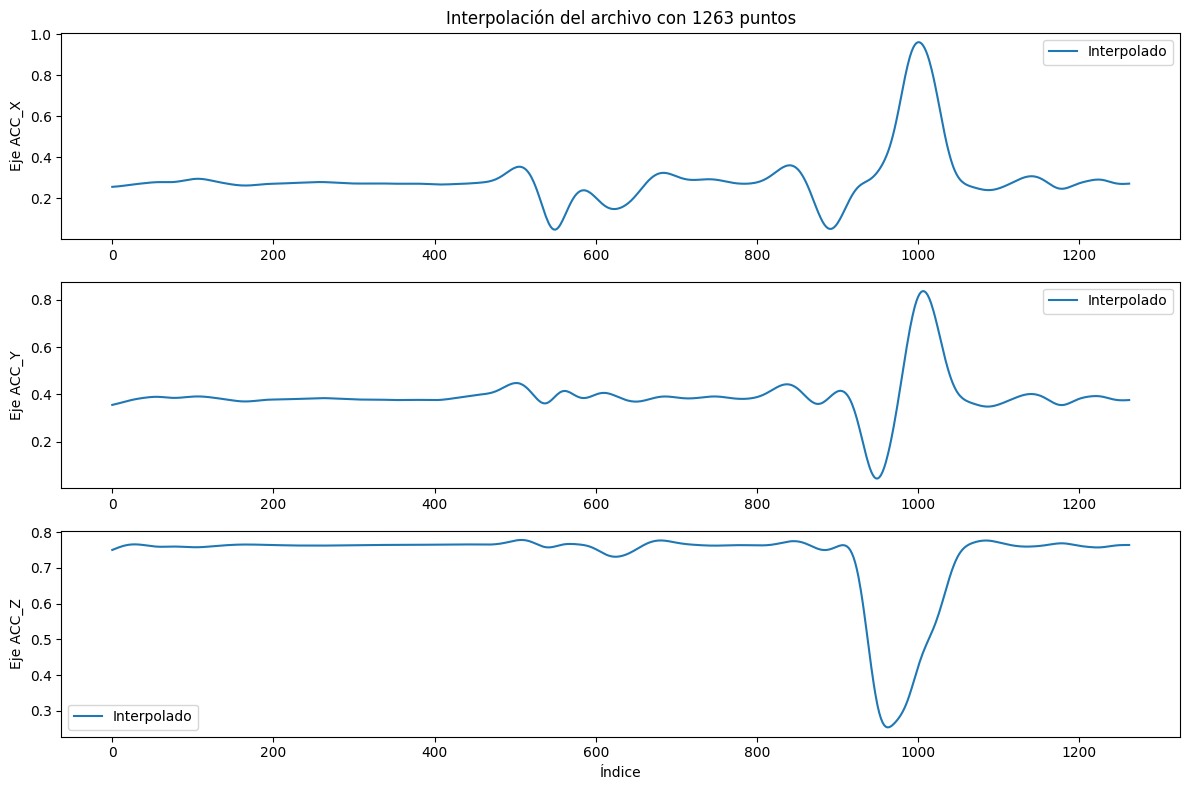

In [6]:


# Ruta de la carpeta original y la nueva carpeta para archivos interpolados
folder_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\fragmentos"
interpolated_folder_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\interpolados_acc"

# Crear la carpeta para los archivos interpolados si no existe
os.makedirs(interpolated_folder_path, exist_ok=True)

# Listar todos los archivos en la carpeta
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Determinar el archivo con el número máximo de puntos
max_points = 1263


# Función para interpolar los datos de un archivo CSV
def interpolate_csv(file_path, output_path, num_points):
    df = pd.read_csv(file_path)
    
    # Asignar las columnas específicas
    x = df['ACC_X'].values
    y = df['ACC_Y'].values
    z = df['ACC_Z'].values
    
    original_points = len(df)

    # Crear el nuevo array de índices para los puntos interpolados
    new_indices = np.linspace(0, original_points - 1, num_points)

    # Crear una función de interpolación para cada eje
    interp_x = interpolate.interp1d(np.arange(original_points), x, kind='linear')
    interp_y = interpolate.interp1d(np.arange(original_points), y, kind='linear')
    interp_z = interpolate.interp1d(np.arange(original_points), z, kind='linear')

    # Generar los nuevos puntos interpolados
    new_x = interp_x(new_indices)
    new_y = interp_y(new_indices)
    new_z = interp_z(new_indices)

    # Crear un nuevo DataFrame con los puntos interpolados
    new_df = pd.DataFrame({'ACC_X': new_x, 'ACC_Y': new_y, 'ACC_Z': new_z})

    # Guardar el nuevo DataFrame en un archivo CSV
    new_df.to_csv(output_path, index=False)

# Interpolar todos los archivos al número máximo de puntos y guardarlos en la nueva carpeta
for file in file_list:
    input_path = os.path.join(folder_path, file)
    output_path = os.path.join(interpolated_folder_path, file)
    try:
        interpolate_csv(input_path, output_path, max_points)
        print(f"Archivo interpolado guardado en: {output_path}")
    except KeyError as e:
        print(f"Error en el archivo {file}: {e}")

# Graficar el archivo con el número máximo de puntos para verificar la interpolación
file_path = os.path.join(interpolated_folder_path, max_file)
df = pd.read_csv(file_path)

plt.figure(figsize=(12, 8))

# Gráfica para el eje X
plt.subplot(3, 1, 1)
plt.plot(df['ACC_X'], label='Interpolado')
plt.title(f'Interpolación del archivo con {max_points} puntos')
plt.ylabel('Eje ACC_X')
plt.legend()

# Gráfica para el eje Y
plt.subplot(3, 1, 2)
plt.plot(df['ACC_Y'], label='Interpolado')
plt.ylabel('Eje ACC_Y')
plt.legend()

# Gráfica para el eje Z
plt.subplot(3, 1, 3)
plt.plot(df['ACC_Z'], label='Interpolado')
plt.ylabel('Eje ACC_Z')
plt.legend()

plt.xlabel('Índice')
plt.tight_layout()
plt.show()
